In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

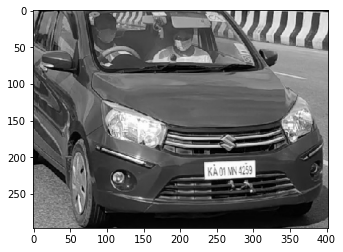

In [68]:
img = cv2.imread('image_4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

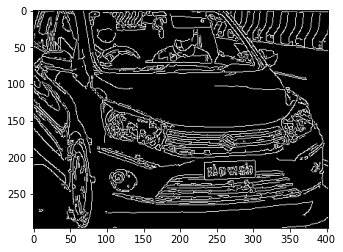

In [69]:
bfilter = cv2.bilateralFilter(gray, 11,17,17) #noise reduction
edge = cv2.Canny(bfilter, 30,200) # edge detection
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

In [70]:
find_contour = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour = imutils.grab_contours(find_contour)
contour = sorted(contour, key= cv2.contourArea, reverse=True)[:10]

In [71]:
location = None
for contours in contour:
    approx = cv2.approxPolyDP(contours, 5, True)
    if len(approx) == 4:
        location = approx
        break;

In [72]:
location

array([[[302, 205]],

       [[301, 228]],

       [[233, 229]],

       [[234, 207]]], dtype=int32)

In [73]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


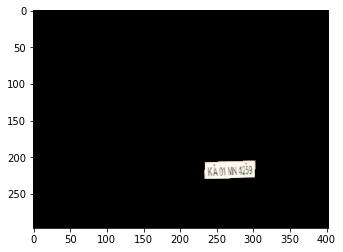

In [74]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [75]:
(x,y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

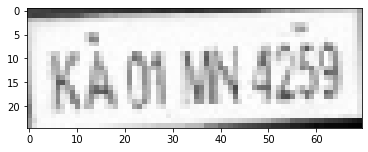

In [76]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))